In [12]:
options(dplyr.summarise.inform = FALSE)
library(tidyverse)
library(data.table)
library(survival)
library(gridExtra)

In [13]:
source(paste0(dirname(dirname(dirname(getwd()))),'/map.r'))
source(paste0(dirname(dirname(dirname(getwd()))),'/stats.r'))

In [14]:
list.files(UTIL_DIR)

[1] "tmp.csv"          "zscores_tmp.csv"  "zscores_tmp2.csv"

#### 0 - Collect previous analyses

In [54]:
system.time(a <- fread(paste0(UTIL_DIR, "zscores_tmp.csv")))
system.time(b <- fread(paste0(UTIL_DIR, "zscores_tmp2.csv")))

   user  system elapsed 
  0.003   0.000   0.005 

   user  system elapsed 
  0.042   0.000   0.043 

In [143]:
zscores <- a %>% filter(grepl("zscore", x))

#### 1 - Ready data

- Z-scores vs OS

In [164]:
zscores <- 
a %>% 
  filter(grepl("zscore", x)) %>% 
  mutate( rk = row_number(pval)) %>% 
  filter(rk < 21)

- LM models 

In [61]:
b <- 
b %>% 
  rowwise() %>% 
  mutate( clean_y = strsplit(y, "rna_mp_zscore_")[[1]][2],
          cell = strsplit( clean_y, "_")[[1]][1]) %>% 
  ungroup() %>% 
  select(-y)

In [110]:
labels <- 
b %>% 
  filter( type != "rna", !grepl("purity", x) ) %>% 
  group_by(clean_y) %>% 
  mutate( rk = row_number(pval)) %>% 
  filter( rk < 3, pval_by < .01	)

#### 1 - Figures

In [182]:
p0 <- ggplot( a, 
             aes( x = est, y = -log10(pval), color = type)) + 
  geom_point() + 
  theme_classic() + 
  xlab("Log hazard estimate") + 
  geom_label(data = zscores, aes(label = x), vjust = 0, size = 3) +
  ylab("-Log10 (p-value)") + 
  ggtitle("OS vs all features (tissue, age, sex adjusted) (top metaprogram z-scores highlighted)") + 
  geom_hline(yintercept = -log10(.01)) + 
  xlim(-.4, .4) + 
  theme(plot.title = element_text(hjust = .5))


Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


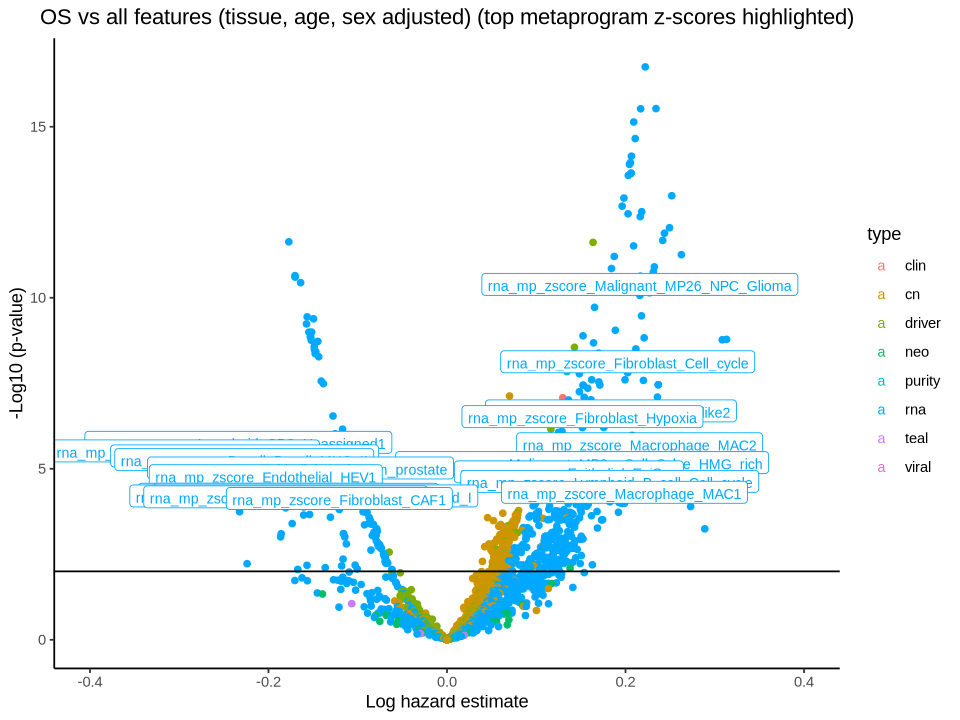

In [183]:
options(repr.plot.width =8, repr.plot.height = 6)
p0

- Metaprogams vs other features

In [153]:
p1 <- ggplot( b %>% filter(type != "rna", !grepl("purity", x)), 
             aes( x = est, y = -log10(pval_by), color = type)) + 
  geom_point() + 
  theme_classic() + 
  xlab("LM beta estimate") + 
  geom_label(data = labels, aes(label = x), vjust = 0, size = 3) +
  ylab("-Log10 (BY Adjusted p-value)") + 
  ggtitle("Top Metaprograms (based on OS) vs Non-RNA features (tissue, age, sex adjusted)") + 
  geom_hline(yintercept = -log10(.01)) + 
  ylim(0, 60) + xlim(-3,3) + 
  facet_wrap(~clean_y, ncol = 5) + 
  theme(plot.title = element_text(hjust = .5))


In [185]:
options(repr.plot.width =13, repr.plot.height = 8)

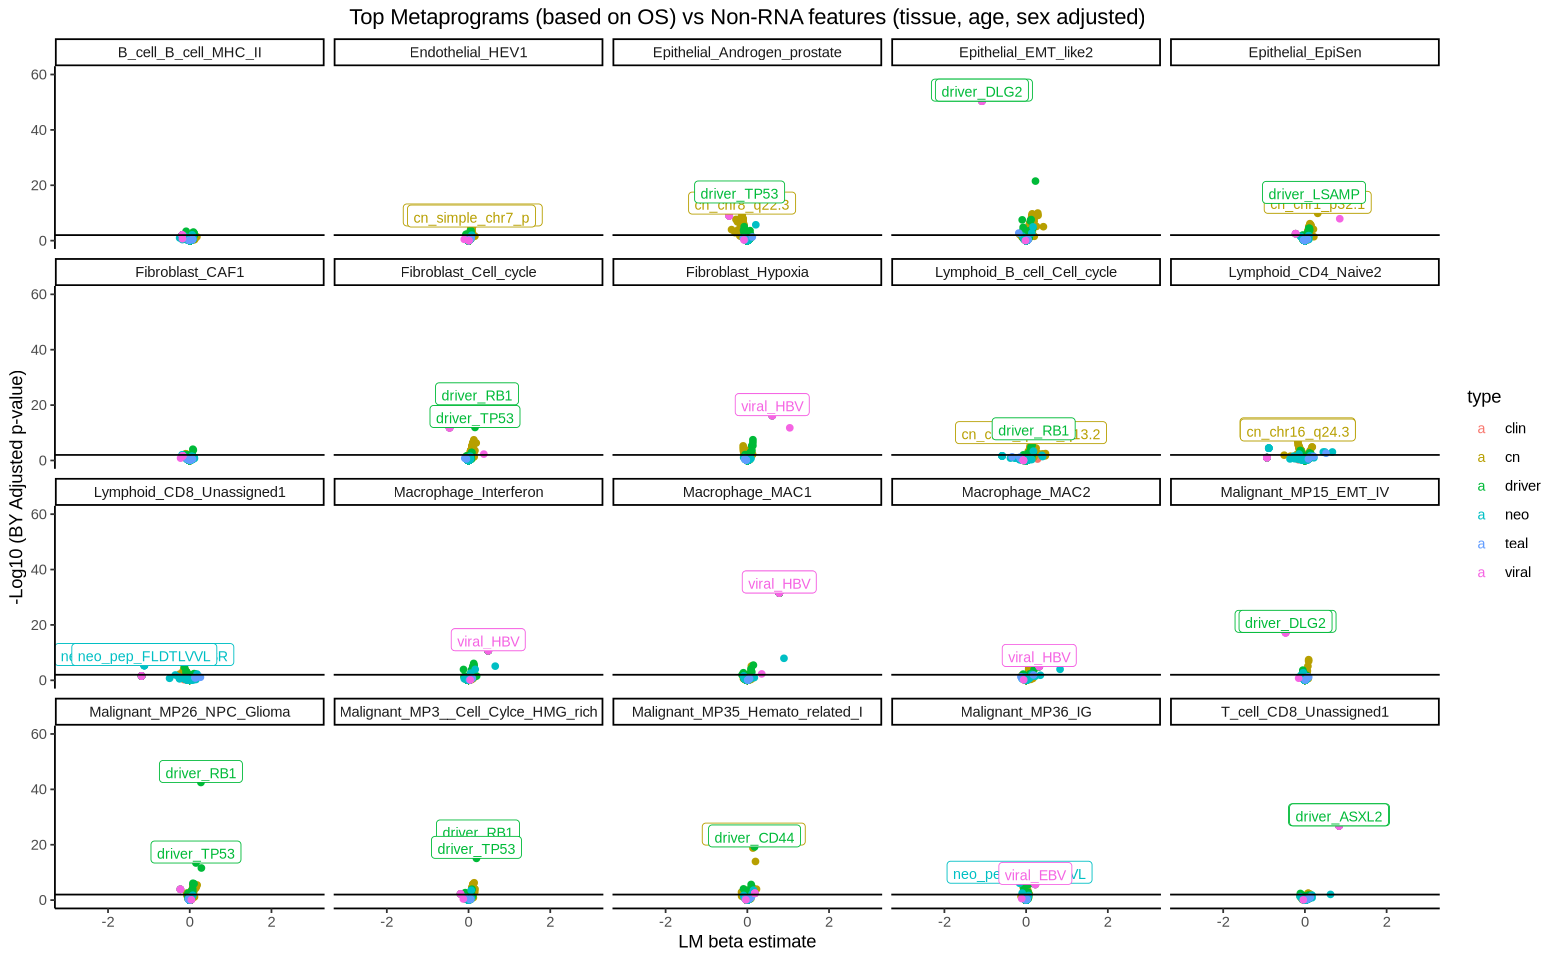

In [186]:
p1